# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

We import four different libraries that are commonly used for data science tasks in Python:

1. **import tensorflow as tf:**
   - TensorFlow library, a powerful framework for machine learning and artificial intelligence used for various tasks, including building and training deep learning models for image recognition.

2. **import matplotlib.pyplot as plt:**
   - This line imports the `matplotlib.pyplot` library, typically abbreviated as `plt`. It provides tools for creating various visualizations like plots, charts, and histograms. 

3. **import pandas as pd:**
   - `pd`: It's a powerful tool for data analysis and manipulation. Pandas excels at working with tabular data structures like DataFrames and Series. 

4. **import seaborn as sns:**
   - `sns`: Seaborn is built on top of Matplotlib and provides a high-level interface for creating statistical graphics. 

In summary, these lines of code equip you with tools for:
   - Building and training machine learning models (TensorFlow)
   - Data visualization (Matplotlib, Seaborn)
   - Data analysis and manipulation (Pandas)


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

1. **Directory Specification**: The function expects the training images to be located in a directory named "train".

2. **Label Inference**: Using **labels="inferred"**, the function infers the labels for the images based on the subfolder names within the "train" directory.

3. **Label Representation**: With **label_mode="categorical"**, the labels are represented using one-hot encoding.

4. **Color Mode**: Images are expected to be in RGB format as specified by **color_mode="rgb"**.

5. **Batch Size**: Training data is processed in batches, each containing 32 images, specified by **batch_size=32**.

6. **Image Resizing**: All images are resized to a uniform size of 128x128 pixels using **image_size=(128, 128)**.

7. **Data Shuffling**: The dataset is shuffled during training to prevent the model from overfitting, indicated by **shuffle=True**.

8. **Random Seed**: The `seed` argument allows for setting a random seed for reproducibility, though it's left as None in this case.

These parameters collectively prepare a training dataset (`training_set`) ready for training a machine learning model for plant disease detection.

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

This is very similar to the previous one, but it's creating a separate validation dataset. Here's a breakdown of what the code does:

* **`validation_set = tf.keras.utils.image_dataset_from_directory(...`**: This line defines a variable named `validation_set` and assigns it the output of the `tf.keras.utils.image_dataset_from_directory` function.

* **`'valid'`**: This argument specifies the directory containing the validation images.  Remember you mentioned having a separate directory called "valid" for validation data.

* **Other arguments**: Most of the arguments are the same as the ones used for the training set:
    * `labels="inferred"`: Inferred labels from subfolder names (assuming disease is encoded in folder structure).
    * `label_mode="categorical"`: Encode labels as categorical variables (suitable for multi-class classification).
    * `class_names=None` (optional): Since labels are inferred, class names are not explicitly provided.
    * `color_mode="rgb"`: Load images in RGB color mode (3 channels for red, green, and blue).
    * `batch_size=32` : This defines the number of images processed together during training (a common choice for efficiency).
    * `image_size=(128, 128)`: Resize images to a uniform size of 128x128 pixels for the model.
    * `shuffle=True` (optional): Shuffle the data order in the validation set for better generalization.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

- `tf.keras.models.Sequential`: This class allows you to create a linear stack of layers. In the context of neural networks, particularly convolutional neural networks (CNNs), this sequential model is a simple way to build a neural network where each layer feeds its output to the next layer in the sequence.

- By using `Sequential`, you're essentially creating an empty container for your CNN architecture. In the next steps, you'll likely add various convolutional layers, pooling layers, and activation functions to define the specific architecture of your CNN for plant disease detection. 

In [4]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

The code you provided defines the first few layers of your CNN model for plant disease detection. Let's break down each line:

**Line 1: Convolutional Layer**

```python
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
```

This line adds a Convolutional 2D (Conv2D) layer to your CNN model. Here's what each parameter controls:

* **`filters=32`**: This defines the number of filters in the convolutional layer. Each filter learns to detect specific features in the input image. Here, 32 filters are used, meaning the layer will learn 32 different features from the input images.
* **`kernel_size=3`**: This specifies the size of the filter kernel. A 3x3 kernel means the filter will slide across the image, analyzing a 3x3 grid of pixels at a time.
* **`padding='same'`**: This padding strategy ensures the output image has the same dimensions as the input image. This is achieved by adding zeros around the borders of the input image before applying the convolution.
* **`activation='relu'`**: This defines the activation function applied to the output of the convolution operation. ReLU (Rectified Linear Unit) is a popular choice that introduces non-linearity to the model, allowing it to learn more complex patterns.
* **`input_shape=[128, 128, 3] (optional for first layer)`**: This argument specifies the expected shape of the input data. Since this is the first layer, it's likely required here to inform the model about the dimensions of your images (128x128 pixels with 3 color channels - RGB).

**Line 2: Another Convolutional Layer**

```python
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
```

This line adds a second convolutional layer with similar parameters:

* **`filters=32`**: Again, 32 filters are used to learn additional features from the input. It's common to use the same number of filters in consecutive convolutional layers.
* **`kernel_size=3`**: The kernel size remains 3x3, maintaining the same analysis grid size.
* **`activation='relu'`**: The ReLU activation function is applied again.

**Line 3: Pooling Layer**

```python
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
```

This line introduces a MaxPooling2D layer. Here's what it does:

* **`pool_size=2`**: This defines the size of the pooling window (2x2 in this case).
* **`strides=2`**: This specifies the stride of the pooling window, which is also 2 in this case. Stride refers to the number of pixels the window moves horizontally and vertically after applying the pooling operation.

`Max pooling` helps reduce the dimensionality of the data while capturing the most important features. It achieves this by downsampling the image, replacing each pooling window with the maximum value within that window. This reduces the spatial resolution of the data while potentially preserving important features.

**Overall, these three lines define the first steps in your CNN architecture. The convolutional layers extract features from the images, and the pooling layer reduces their dimensionality.**  


In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

c:\Users\alway\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

**1. Convolutional Layers (tf.keras.layers.Conv2D):

These layers are the core building blocks of CNNs. They extract features from the input images using learnable filters.

The first two occurrences (cnn.add(...)) use the following arguments:

filters=32: This defines the number of filters in the convolutional layer. Each filter learns to detect specific features in the image.
kernel_size=3: This specifies the size of the filter (a 3x3 grid in this case).
padding='same': This ensures the output has the same spatial dimensions as the input (achieved by padding the image with zeros).
activation='relu': This applies the ReLU (Rectified Linear Unit) activation function, which introduces non-linearity and helps the network learn complex patterns.
input_shape=[128, 128, 3]: This argument (only provided in the first layer) defines the shape of the input image (128x128 pixels with 3 color channels for RGB).
The subsequent occurrences (cnn.add(...)) have similar arguments but might omit input_shape as it's already defined. They increase the filter count (filters) as we go deeper into the network (32, 64, 128, 256, 512) allowing the model to learn more intricate features.

**2. Max Pooling Layers (tf.keras.layers.MaxPool2D):

These layers downsample the feature maps produced by the convolutional layers.
The arguments used here are:
pool_size=2: This defines the size of the pooling window (2x2 grid in this case).
strides=2: This specifies the stride of the pooling operation (moving the window by 2 pixels at a time).
Max pooling reduces the spatial dimensions of the data while retaining the most important features based on the maximum value within the pooling window. This helps reduce the number of parameters in the model and control overfitting.
Overall Structure:

The architecture you defined consists of several stacked convolutional and pooling layers. It follows a common CNN pattern where the initial layers extract low-level features (edges, shapes) and later layers combine these features to learn more complex patterns specific to different plant diseases in your dataset.  The increasing number of filters as we go deeper allows the model to capture a wider range of features.  The pooling layers help reduce the dimensionality of the data and prevent overfitting

The line `cnn.add(tf.keras.layers.Dropout(0.25))` adds a Dropout layer with a rate of 25% to your CNN model. Dropout is a technique that randomly drops neurons during training, forcing the model to learn more robust features and reducing overfitting. It's like training a group of students in random subsets to improve their individual skills and overall performance. This helps the model generalize better to unseen plant disease images.  

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

- Convolutional layers in CNNs produce feature maps with multiple dimensions (typically height, width, and number of channels).
- Fully connected layers in neural networks, however, require one-dimensional input vectors.
- The Flatten layer bridges this gap by transforming the multi-dimensional feature maps from the convolutional layers into a single long vector

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [15]:
# cnn.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1580s 717ms/step - accuracy: 0.3717 - loss: 2.2492 - val_accuracy: 0.7926 - val_loss: 0.6282
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1415s 644ms/step - accuracy: 0.8332 - loss: 0.5347 - val_accuracy: 0.8960 - val_loss: 0.3323
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1397s 636ms/step - accuracy: 0.9047 - loss: 0.3003 - val_accuracy: 0.9337 - val_loss: 0.2107
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2093s 953ms/step - accuracy: 0.9388 - loss: 0.1903 - val_accuracy: 0.9407 - val_loss: 0.1876
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1351s 615ms/step - accuracy: 0.9519 - loss: 0.1473 - val_accuracy: 0.9440 - val_loss: 0.1781
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1329s 605ms/step - accuracy: 0.9645 - loss: 0.1077 - val_accuracy: 0.9571 - val_loss: 0.1448
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1372s 624ms/step - accuracy: 0.9713 - loss: 0.0883 - val_accuracy: 0.9515 - val_loss: 0.1517
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1773s 807ms/s

## Evaluating Model

In [18]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 290s 132ms/step - accuracy: 0.9877 - loss: 0.0406
Training accuracy: 0.9888043403625488


In [19]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 73s 132ms/step - accuracy: 0.9633 - loss: 0.1300
Validation accuracy: 0.9628955125808716


### Saving Model

In [20]:
cnn.save('trained_plant_disease_model.keras')

In [21]:
training_history.history #Return Dictionary of history

{'accuracy': [0.5746496915817261,
  0.8570311069488525,
  0.9135500192642212,
  0.9435663819313049,
  0.9553880095481873,
  0.9660146236419678,
  0.9720179438591003,
  0.976385235786438,
  0.9794437885284424,
  0.981307327747345],
 'loss': [1.4515740871429443,
  0.4537109434604645,
  0.2678573429584503,
  0.17467953264713287,
  0.13633742928504944,
  0.10187632590532303,
  0.08600538223981857,
  0.07178619503974915,
  0.061206620186567307,
  0.05644169822335243],
 'val_accuracy': [0.7925677299499512,
  0.89597088098526,
  0.9337013363838196,
  0.9407011270523071,
  0.9440017938613892,
  0.9570908546447754,
  0.9514568448066711,
  0.9616435170173645,
  0.9677327275276184,
  0.9628955125808716],
 'val_loss': [0.6282141804695129,
  0.3323097825050354,
  0.21072962880134583,
  0.18757079541683197,
  0.17806294560432434,
  0.14477147161960602,
  0.1517472267150879,
  0.12167757749557495,
  0.10617479681968689,
  0.13192757964134216]}

In [22]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [23]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

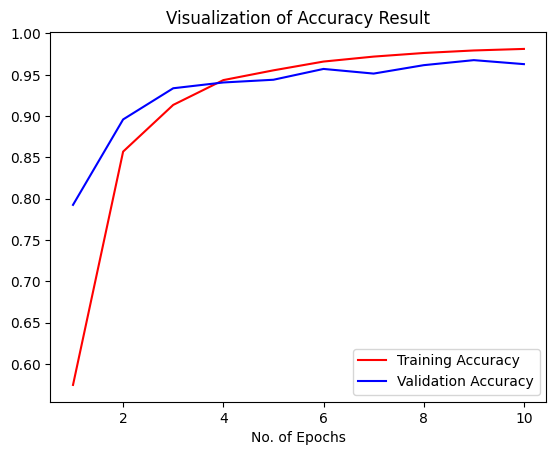

In [24]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [25]:
class_name = validation_set.class_names

In [26]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [27]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 180s 10ms/step


In [28]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [29]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [30]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [31]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [32]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.95      0.97       504
                                 Apple___Black_rot       0.98      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.96      0.99      0.97       440
                                   Apple___healthy       0.93      0.96      0.94       502
                               Blueberry___healthy       0.96      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.97      1.00      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.89      0.95      0.92       410
                       Corn_(maize)___Common_rust_       1.00      0.97      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.93      0.

### Confusion Matrix Visualization

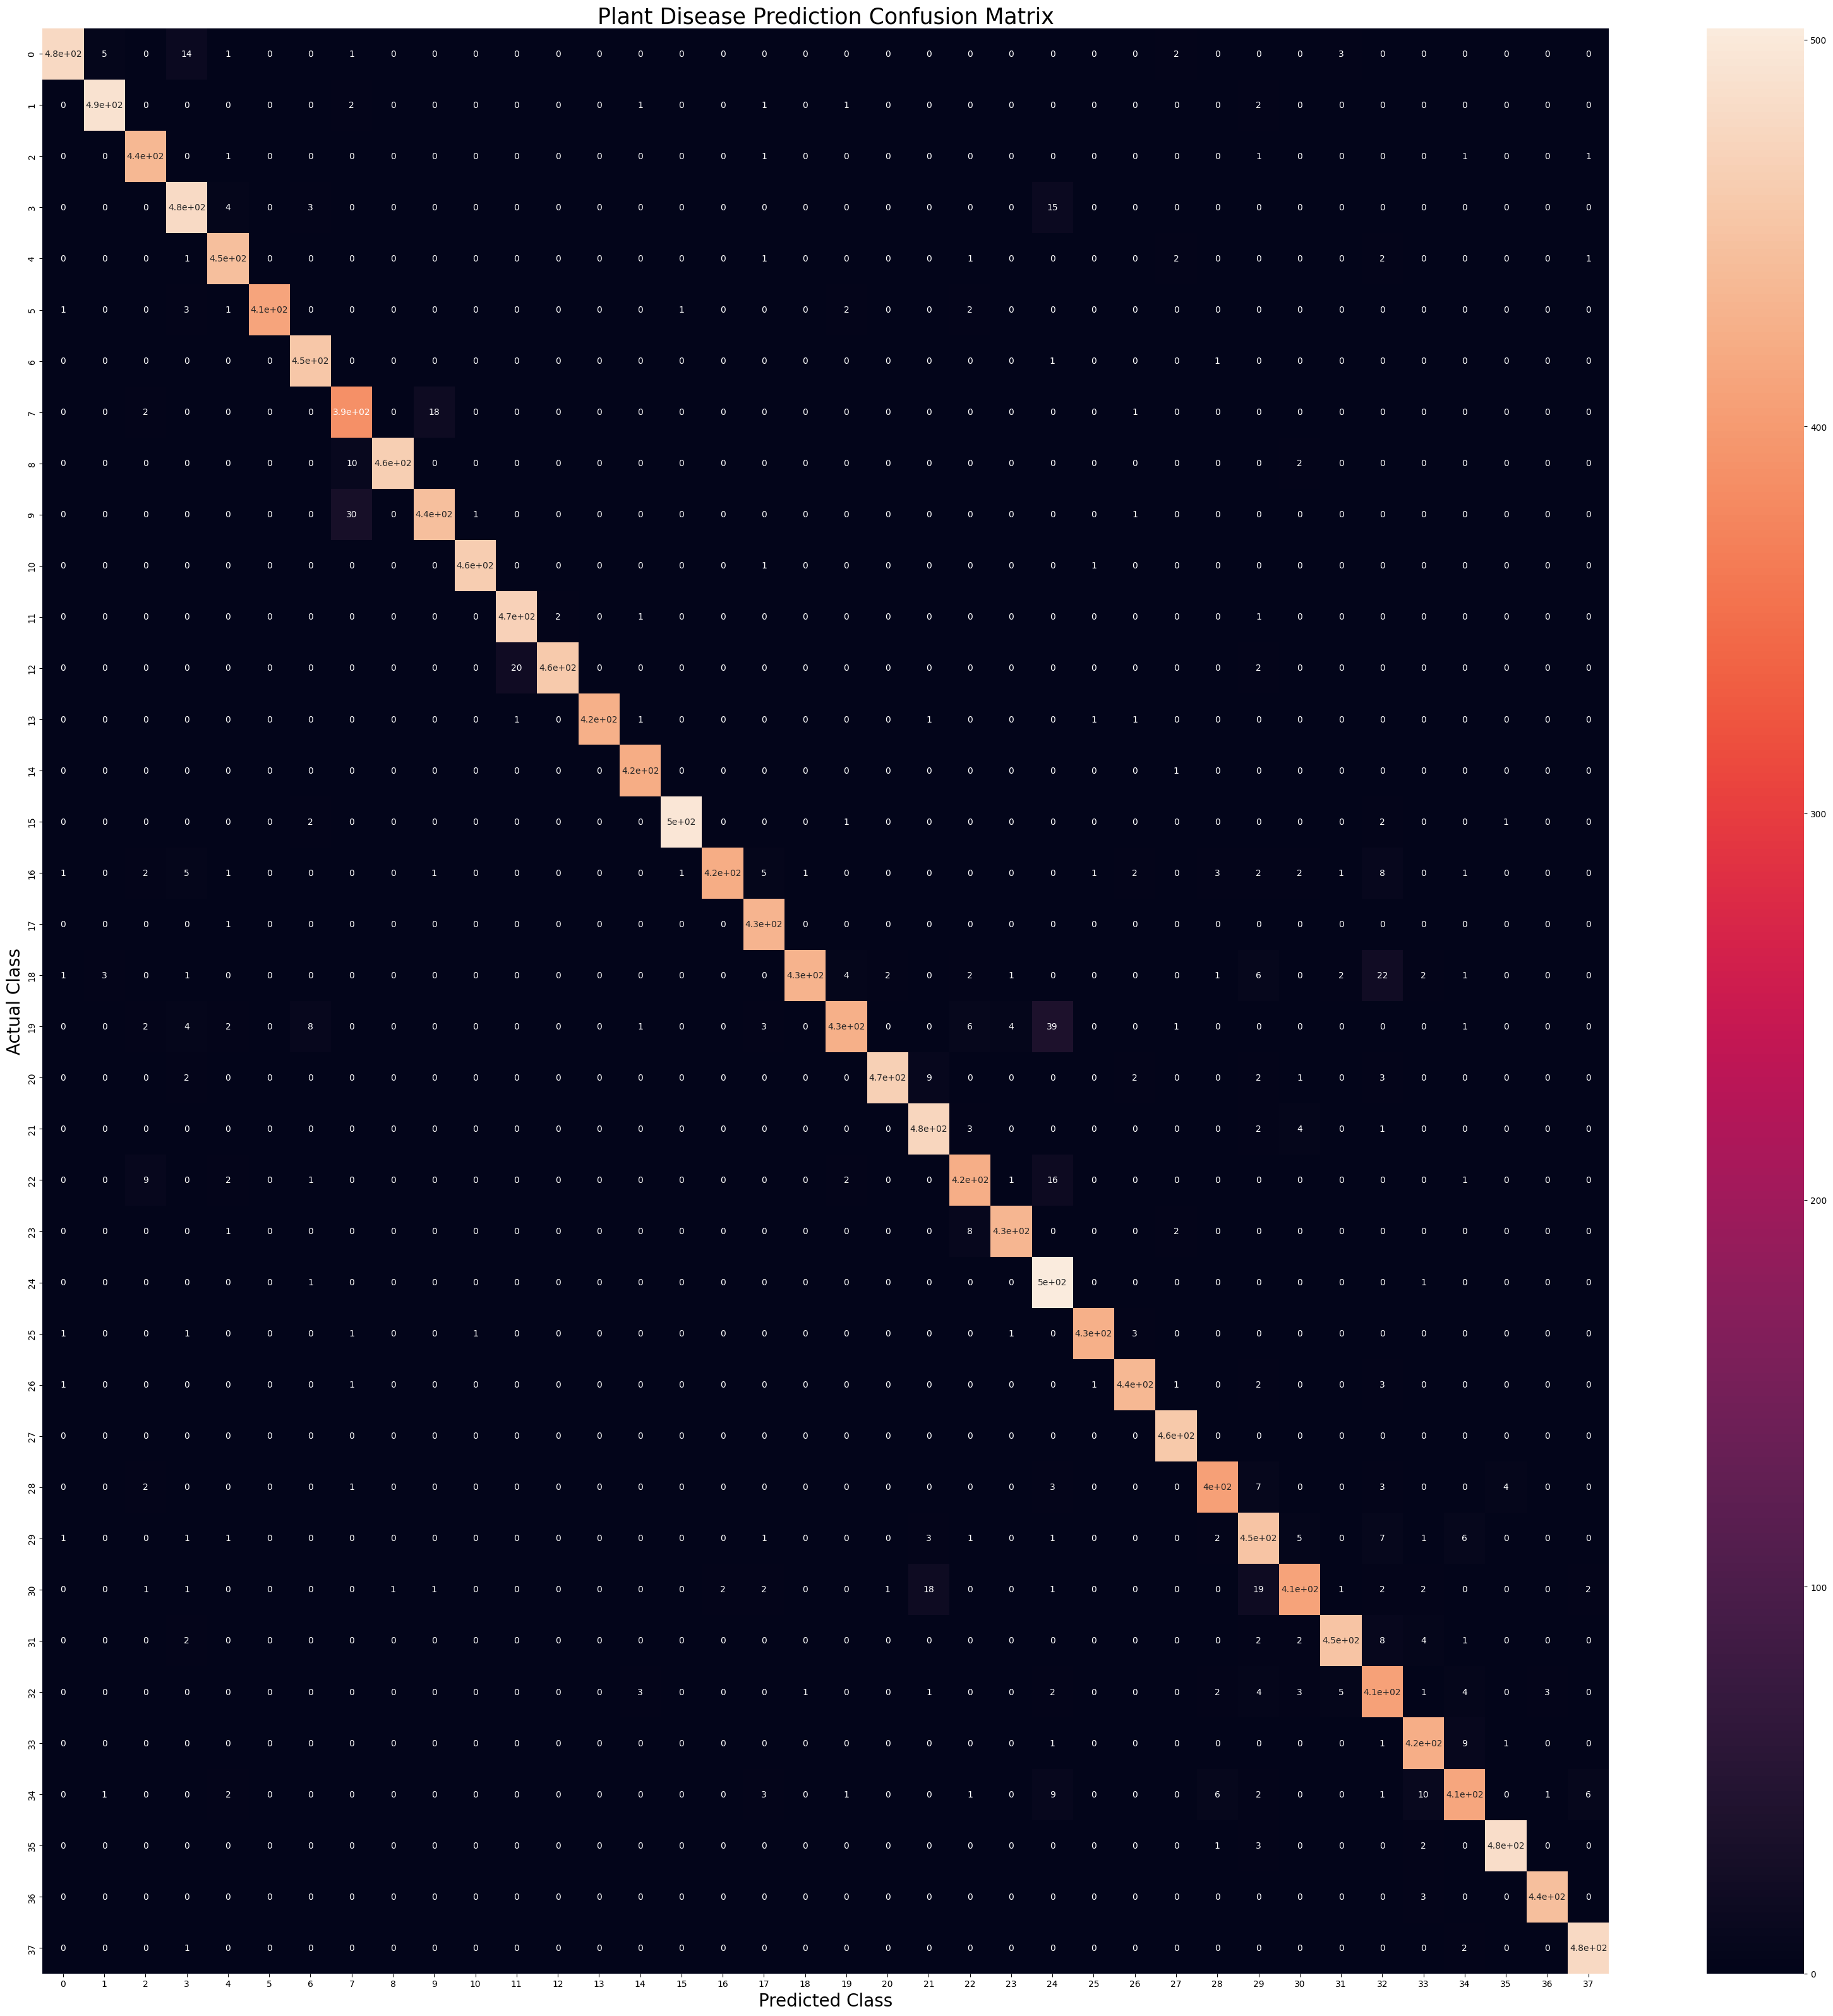

In [33]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()